In [1]:
import numpy as np
from sklearn.model_selection import KFold

X = ["a", "b", "c", "d"]
kf = KFold(n_splits = 4)
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 2 3] [1]
[0 1 3] [2]
[0 1 2] [3]


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

iris = load_iris()
print('iris 데이터 레이블 파악 \n{}' .format(iris.target))

iris 데이터 레이블 파악 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
logreg = LogisticRegression()
kfold = KFold(n_splits = 3)
scores = cross_val_score(logreg, iris.data, iris.target, cv = kfold)
print(scores)

[0. 0. 0.]


In [4]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

make_class = make_classification(n_samples = 500, 
                                n_features = 3,
                                n_redundant = 0,
                                n_informative = 2,
                                n_classes = 3,
                                n_clusters_per_class = 1,
                                random_state = 1)
data = pd.DataFrame(make_class[0], columns = range(make_class[0].shape[1]))
data['target'] = make_class[1]
data.head()

,0,1,2,target
0,-0.171870,-0.843911,0.111383,1
1,-1.605341,-1.325491,-0.765777,2
2,-0.995140,0.186075,-0.962897,2
3,0.876133,0.101203,-1.116981,1
4,0.947067,0.569125,1.311654,0


In [5]:
kfold = KFold(n_splits = 3, random_state = 15, shuffle = True)
splits = kfold.split(data, data['target'])
print(f'타겟 데이터 비율\n{data["target"].value_counts() / len(data)}\n\n')
for n, (train_index, test_index) in enumerate(splits):
    if n == 2: 
        print(f'{n * 1}번째 fold 학습 데이터: {np.round(len(train_index) / (len(train_index) + len(test_index)), 2)})' +
                     f'\t테스트 데이터 비율: {np.round(len(test_index) / (len(train_index) + len(test_index)), 2)}\n학습 데이터에 있는 타겟 비율\n' +
                     f'{data.iloc[test_index, 3].value_counts() / len(data.iloc[test_index, 3])}\n\n테서트 데이터에 있는 타겟 비율\n' +
                     f'{data.iloc[train_index, 3].value_counts() / len(data.iloc[train_index, 3])}\n\n')

타겟 데이터 비율
0    0.338
2    0.334
1    0.328
Name: target, dtype: float64


2번째 fold 학습 데이터: 0.67)	테스트 데이터 비율: 0.33
학습 데이터에 있는 타겟 비율
1    0.343373
2    0.343373
0    0.313253
Name: target, dtype: float64

테서트 데이터에 있는 타겟 비율
0    0.350299
2    0.329341
1    0.320359
Name: target, dtype: float64




In [6]:
kfold = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 10)
splits = kfold.split(data, data['target'])
print(f'타겟 데이터 비율\n{data["target"].value_counts() / len(data)}\n\n')
for n, (train_index, test_index) in enumerate(splits):
    if n == 2: 
        print(f'{n * 1}번째 fold 학습 데이터: {np.round(len(train_index) / (len(train_index) + len(test_index)), 2)})' +
                     f'\t테스트 데이터 비율: {np.round(len(test_index) / (len(train_index) + len(test_index)), 2)}\n학습 데이터에 있는 타겟 비율\n' +
                     f'{data.iloc[test_index, 3].value_counts() / len(data.iloc[test_index, 3])}\n\n테서트 데이터에 있는 타겟 비율\n' +
                     f'{data.iloc[train_index, 3].value_counts() / len(data.iloc[train_index, 3])}\n\n')

타겟 데이터 비율
0    0.338
2    0.334
1    0.328
Name: target, dtype: float64


2번째 fold 학습 데이터: 0.67)	테스트 데이터 비율: 0.33
학습 데이터에 있는 타겟 비율
0    0.337349
2    0.337349
1    0.325301
Name: target, dtype: float64

테서트 데이터에 있는 타겟 비율
0    0.338323
2    0.332335
1    0.329341
Name: target, dtype: float64




In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import numpy as np

iris_data = load_iris()
dt = DecisionTreeClassifier(random_state = 42)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt, data, label, scoring = 'accuracy', cv = 3)
print('교차 검증별 정확도: ', np.round(scores, 2))
print('평균 검증 정확도: ', np.round(np.mean(scores), 2))

교차 검증별 정확도:  [0.98 0.94 0.96]
평균 검증 정확도:  0.96


In [8]:
import sklearn.datasets as data
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x = data.load_breast_cancer()
cancer = pd.DataFrame(data = x.data, columns = x.feature_names)
cancer['target'] = x.target

X = cancer.iloc[:, :-1]
y = cancer.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

from sklearn.model_selection import GridSearchCV

dt_clf = DecisionTreeClassifier(random_state = 10)

parameters = {'max_depth': [3, 5, 7], 'min_samples_split': [3, 5]}

grid_dt = GridSearchCV(dt_clf, param_grid = parameters, cv = 5, refit = True)
grid_dt.fit(X_train, y_train)
grid_dt.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_min_samples_split', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [9]:
result = pd.DataFrame(grid_dt.cv_results_)
result[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score
0,"{'max_depth': 3, 'min_samples_split': 3}",0.922025,1,0.9500,0.9375
1,"{'max_depth': 3, 'min_samples_split': 5}",0.922025,1,0.9500,0.9375
2,"{'max_depth': 5, 'min_samples_split': 3}",0.914462,3,0.9250,0.9250
3,"{'max_depth': 5, 'min_samples_split': 5}",0.909430,4,0.9250,0.9375
4,"{'max_depth': 7, 'min_samples_split': 3}",0.904462,6,0.8875,0.9250
5,"{'max_depth': 7, 'min_samples_split': 5}",0.906930,5,0.9000,0.9375


In [10]:
estimator = grid_dt.best_estimator_
pred = estimator.predict(X_test)

from sklearn.metrics import accuracy_score
print('테스트 셋 정확도: ', accuracy_score(y_test, pred))

테스트 셋 정확도:  0.9473684210526315


In [11]:
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as ms

x = data.load_breast_cancer()
cancer = pd.DataFrame(data = x.data, columns = x.feature_names)
cancer['target'] = x.target

X = cancer.iloc[:, :-1]
y = cancer.iloc[:, -1]

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.3, random_state = 100)

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [12]:
from sklearn.model_selection import RandomizedSearchCV

max_depths = range(1, 5, 1)
min_samples_split = range(2, 12, 1)
min_samples_leaf = range(1, 100, 2)

param_grid = {
    'max_depth': max_depths,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

import time
start = time.time()
random_dtc = RandomizedSearchCV(DecisionTreeClassifier(), param_grid, random_state = 1, n_iter = 100, cv = 5, n_jobs = -1)
random_dtc.fit(X_train_std, y_train)
print('It takes %s minutes' % ((time.time() - start) / 60))
print('랜덤 서치를 통해서 찾은 최적 하이퍼 파라미터 조합\n', random_dtc.best_params_)


It takes 0.028263314565022787 minutes
랜덤 서치를 통해서 찾은 최적 하이퍼 파라미터 조합
 {'min_samples_split': 5, 'min_samples_leaf': 11, 'max_depth': 3}


In [13]:
from bayes_opt import BayesianOptimization

def target(x):
    return np.exp(-(x-5)**2) + np.exp(-(2*x-2)**2) + 4/(x-3)**2

bayes_optimizer = BayesianOptimization(target, {'x': (-2, 10)}, random_state = 0)
bayes_optimizer.maximize(init_points = 2, n_iter = 14, acq = 'ei')

|   iter    |  target   |     x     |
-------------------------------------
|  1        |  2.433    |  4.586    |
|  2        |  0.3935   |  6.582    |
|  3        |  2.449    |  4.574    |
|  4        |  5.976    |  3.836    |
|  5        |  13.26    |  3.552    |
|  6        |  22.8     |  3.42     |
|  7        |  35.91    |  3.334    |
|  8        |  55.39    |  3.269    |
|  9        |  35.92    |  3.334    |
|  10       |  87.9     |  3.213    |
|  11       |  132.8    |  3.174    |
|  12       |  200.2    |  3.141    |
|  13       |  304.5    |  3.115    |
|  14       |  462.8    |  3.093    |
|  15       |  695.7    |  3.076    |
|  16       |  1.093e+0 |  3.061    |


In [14]:
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection as model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [15]:
data = pd.read_csv('penguins.txt')
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [16]:
print('데이터 크기', data.shape)
print('데이터 내용', data.columns)

데이터 크기 (344, 7)
데이터 내용 Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


펭귄 종류별 수


Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

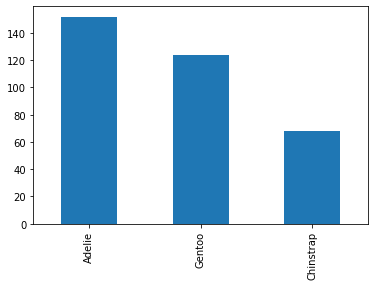

In [18]:
print('펭귄 종류별 수')
data['species'].value_counts().plot(kind = 'bar')
data['species'].value_counts()

In [19]:
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [20]:
col_missing = ['bill_depth_mm', 'bill_length_mm', 'flipper_length_mm', 'body_mass_g']
for column in col_missing:
    data[column].fillna(data[column].median(), inplace = True)

In [21]:
data['sex'] = data['sex'].fillna('MALE')

In [22]:
lb_sex = LabelEncoder()
data['sex'] = lb_sex.fit_transform(data["sex"])
data['sex'][:5]

0    1
1    0
2    0
3    1
4    0
Name: sex, dtype: int64

In [23]:
lb_island = LabelEncoder()
data['island'] = lb_island.fit_transform(data['island'])

In [24]:
lb_species = LabelEncoder()
data['species'] = lb_species.fit_transform(data['species'])
print('종 라벨 인코딩')
for i, j in enumerate(lb_species.classes_):
    print(j, '->', i)

종 라벨 인코딩
Adelie -> 0
Chinstrap -> 1
Gentoo -> 2


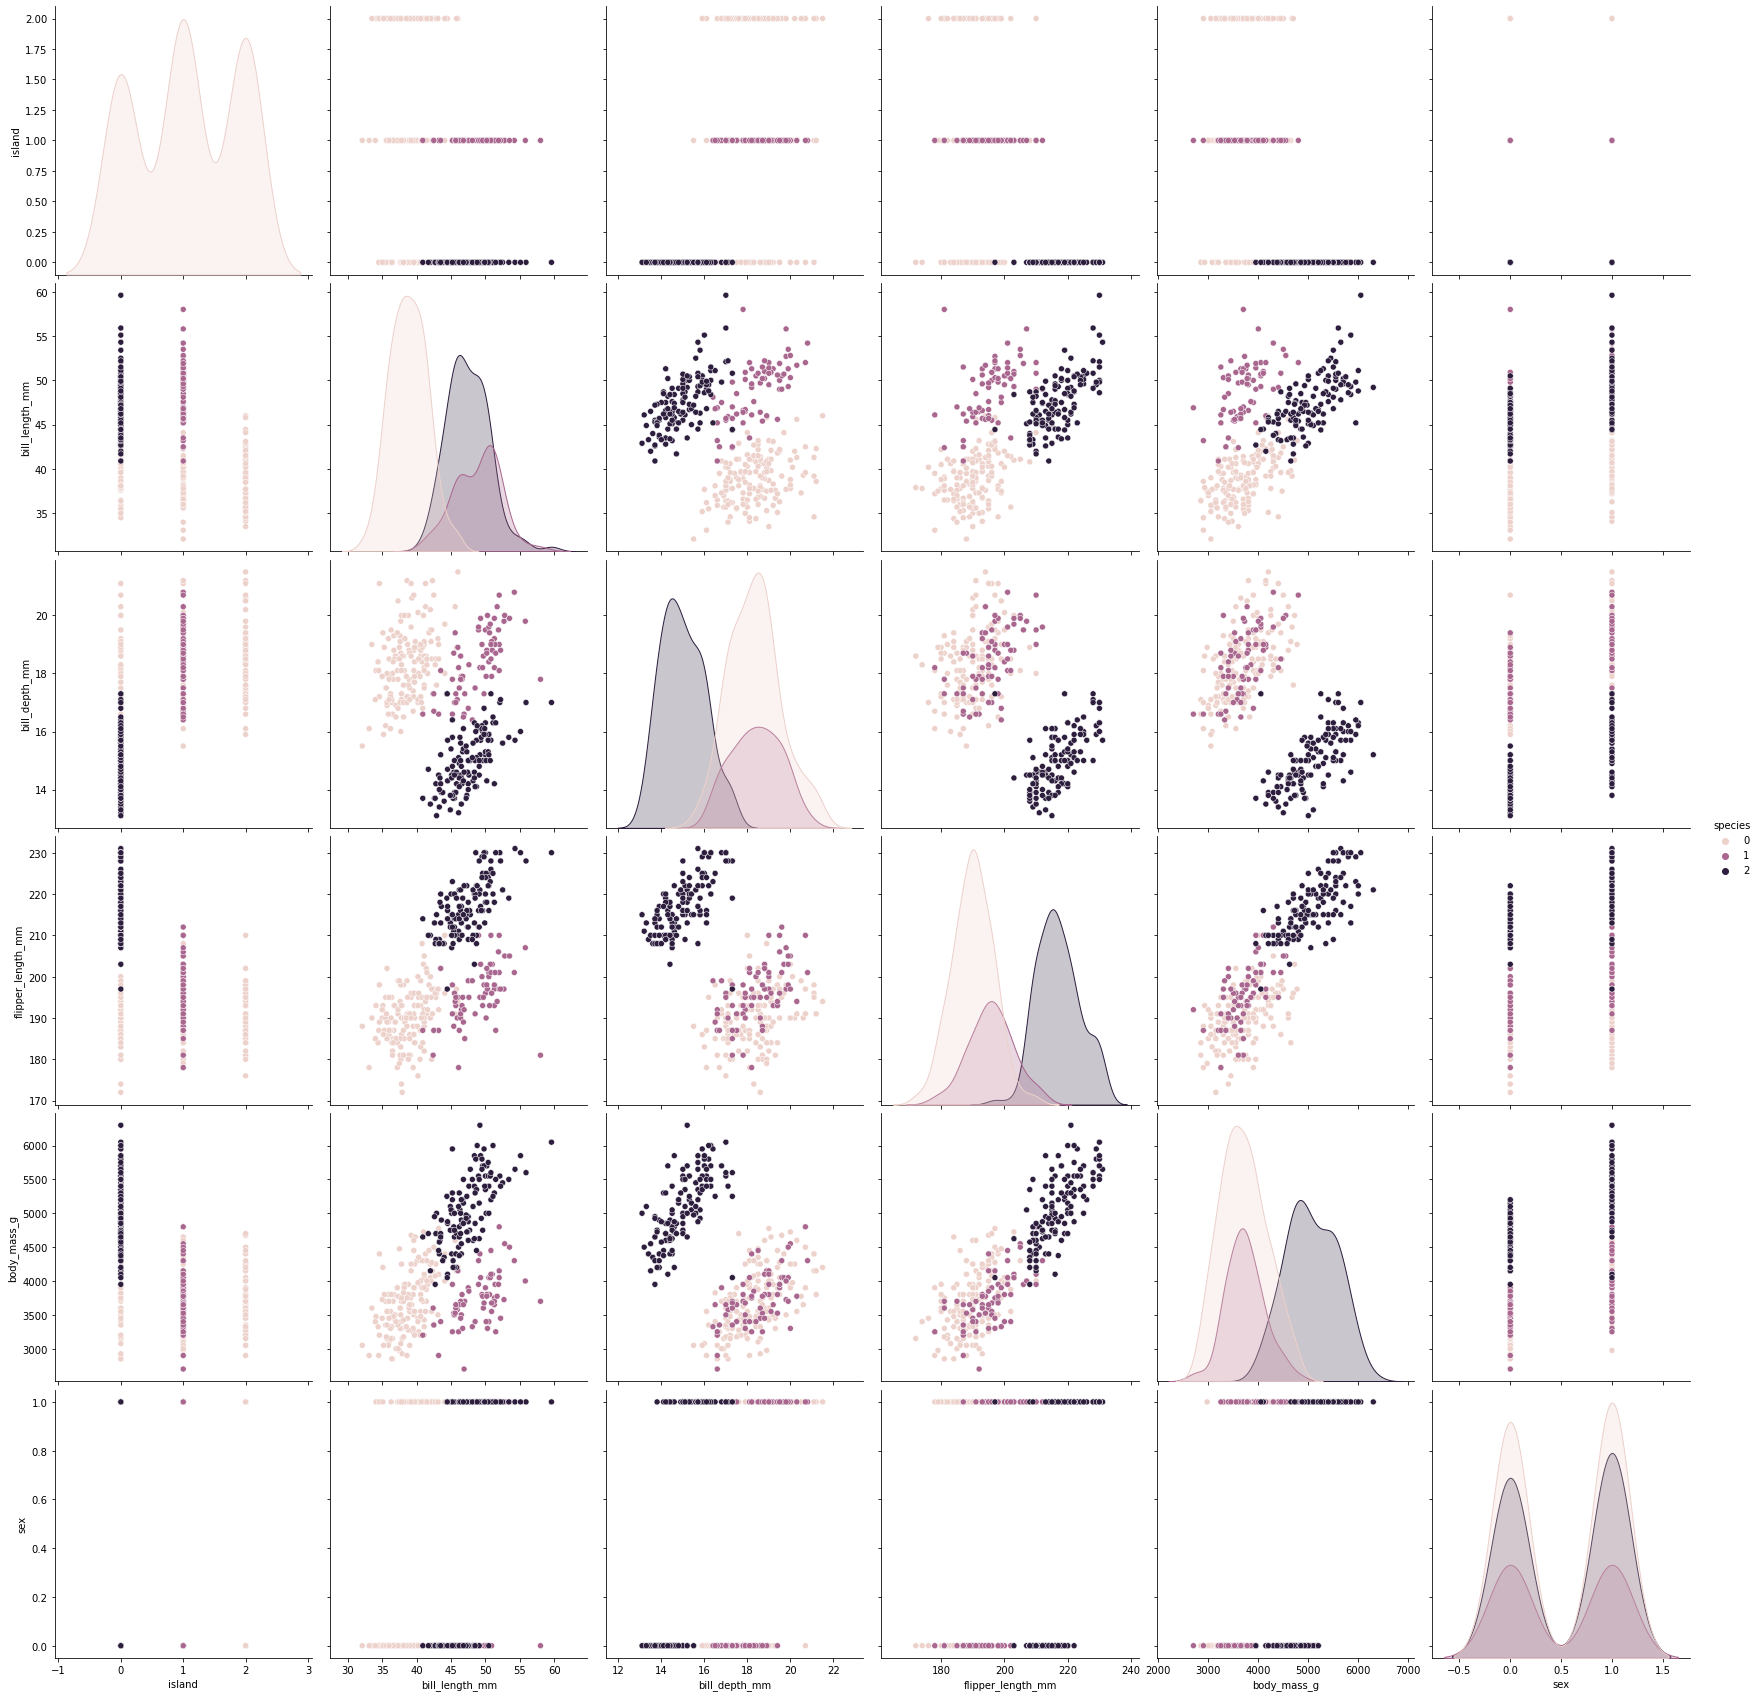

In [25]:
sns.pairplot(data, hue = 'species', height = 4)
plt.show()

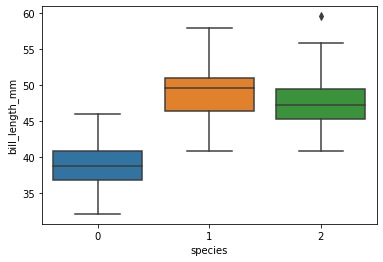

In [26]:
sns.boxplot(x = 'species', y = 'bill_length_mm', data = data)
plt.show()

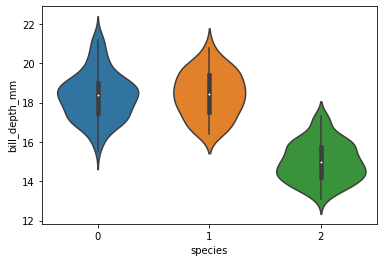

In [27]:
sns.violinplot(x = 'species', y = 'bill_depth_mm', data = data)
plt.show()

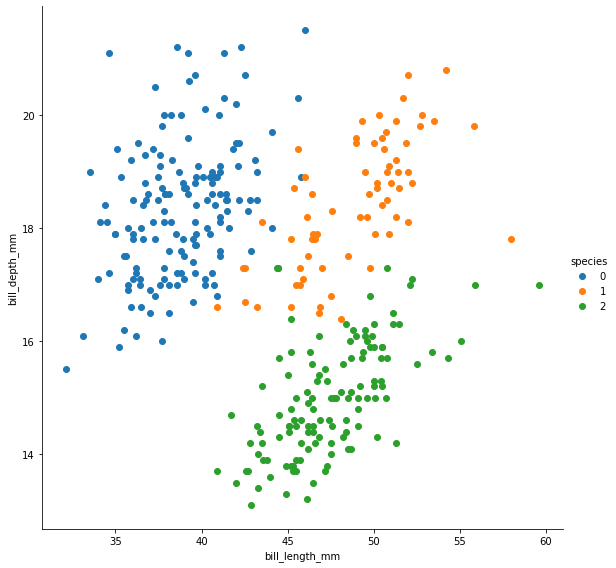

In [28]:
sns.FacetGrid(data, hue = 'species', height = 8).map(plt.scatter, 'bill_length_mm', 'bill_depth_mm').add_legend()

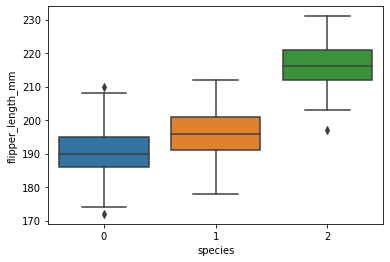

In [29]:
sns.boxplot(x = 'species', y = 'flipper_length_mm', data = data)
plt.show()

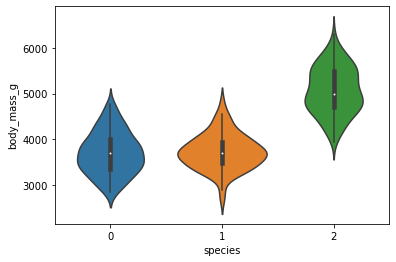

In [30]:
sns.violinplot(x = 'species', y = 'body_mass_g', data = data)
plt.show()

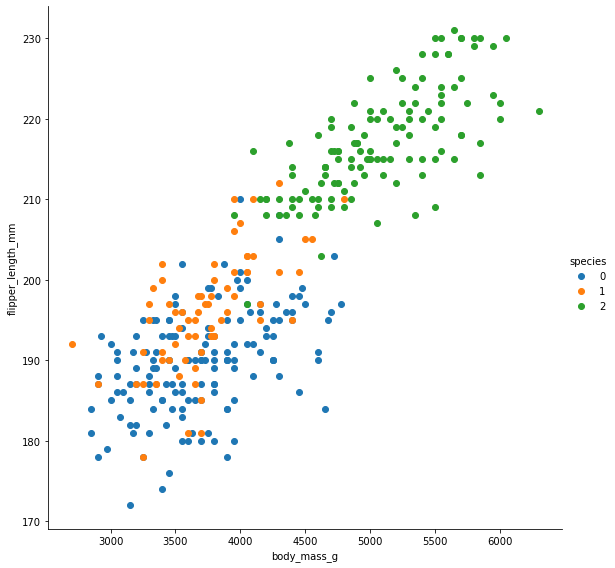

In [31]:
sns.FacetGrid(data, hue = 'species', height = 8).map(plt.scatter, 'body_mass_g', 'flipper_length_mm').add_legend()

In [32]:
y = data['species']
x = data.drop('species', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 10)
print(x_train.shape)
print(y_train.shape)

(240, 6)
(240,)


In [33]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [34]:
svc = SVC(random_state = 10)
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

In [35]:
import time
start = time.time()
grid_search = GridSearchCV(svc, param_grid, refit = True)
grid_search.fit(x_train, y_train)
print('It takes %s minutes' % ((time.time() - start)/60))

It takes 0.0032348831494649253 minutes


In [36]:
print(grid_search.best_params_)

{'C': 10, 'gamma': 1}


In [37]:
grid_predictions = grid_search.predict(x_test)
print(confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))

[[41  1  0]
 [ 0 24  0]
 [ 0  0 38]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.96      1.00      0.98        24
           2       1.00      1.00      1.00        38

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [38]:
rand_list = {'C': stats.uniform(2, 13), 'gamma': stats.uniform(0.1, 1)}
import time
start = time.time()
rand_search = RandomizedSearchCV(svc, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 10, scoring = 'accuracy')
rand_search.fit(x_train, y_train)
print('It takes %s minutes' % ((time.time() - start)/60))

It takes 0.019151186943054198 minutes


In [39]:
print(rand_search.best_params_)

{'C': 12.027168362467698, 'gamma': 0.1207519493594015}


In [40]:
rand_predictions = rand_search.predict(x_test)
print(confusion_matrix(y_test, rand_predictions))
print(classification_report(y_test, rand_predictions))

[[41  1  0]
 [ 0 24  0]
 [ 0  0 38]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       0.96      1.00      0.98        24
           2       1.00      1.00      1.00        38

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104



In [41]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas.plotting import parallel_coordinates

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV

from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.model_selection import cross_val_score
from sklearn.metrics import *

In [42]:
iris = load_iris()

df = pd.DataFrame(iris.data, columns = iris.feature_names)
y = pd.Series(iris.target, dtype = "category")
y = y.cat.rename_categories(iris.target_names)
df['species'] = y
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [43]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [44]:
df.groupby('species').size()

species
setosa        50
versicolor    50
virginica     50
dtype: int64

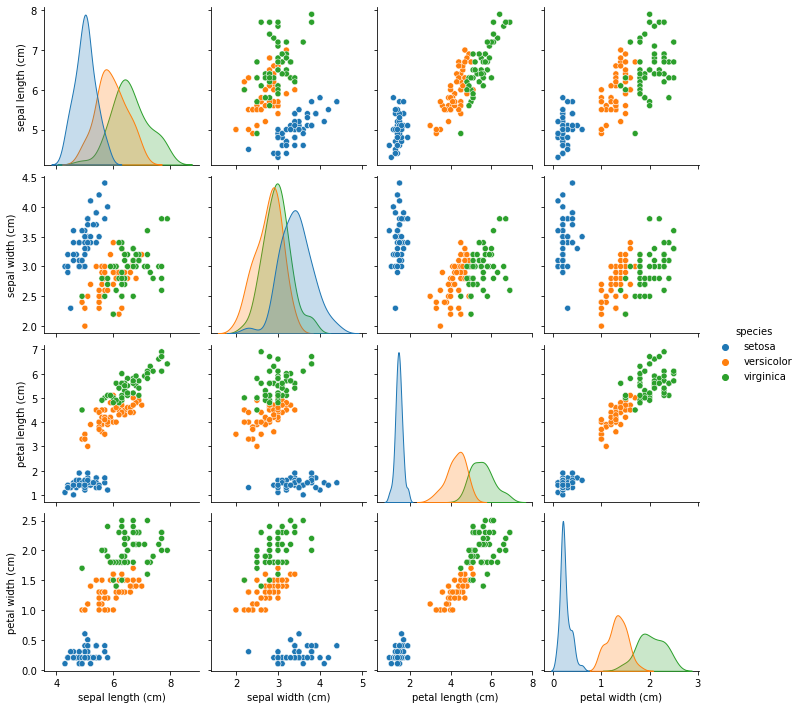

In [45]:
sns.pairplot(df, hue = 'species')
plt.show()

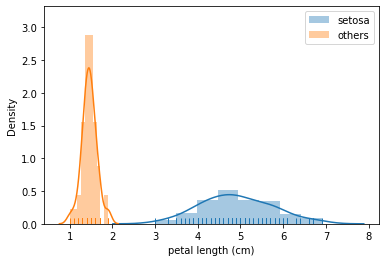

In [46]:
sns.distplot(df[df.species != "setosa"]["petal length (cm)"], hist = True, rug = True, label = "setosa")
sns.distplot(df[df.species == "setosa"]["petal length (cm)"], hist = True, rug = True, label = "others")
plt.legend()
plt.show()

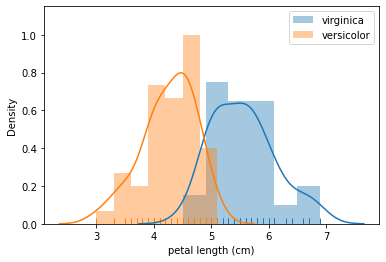

In [47]:
sns.distplot(df[df.species == "virginica"]["petal length (cm)"], hist = True, rug = True, label = "virginica")
sns.distplot(df[df.species == "versicolor"]["petal length (cm)"], hist = True, rug = True, label = "versicolor")
plt.legend()
plt.show()

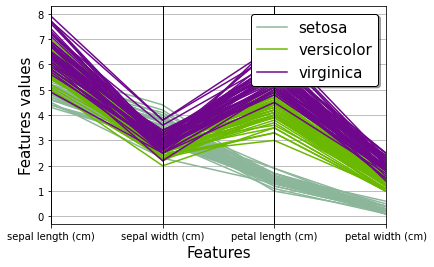

In [48]:
parallel_coordinates(df, "species")
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Features values', fontsize = 15)
plt.legend(loc = 1, prop = {'size': 15}, frameon = True, shadow = True, facecolor = "white", edgecolor = "black")
plt.show()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df.iloc[:,-1], test_size = 0.2, random_state = 42)

In [50]:
ss = StandardScaler()
X_train = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
print(X_train.mean())
print(X_train.var())
X_test = ss.transform(X_test)

sepal length (cm)    1.713444e-15
sepal width (cm)    -1.665797e-15
petal length (cm)   -2.238950e-16
petal width (cm)    -5.736152e-17
dtype: float64
sepal length (cm)    1.008403
sepal width (cm)     1.008403
petal length (cm)    1.008403
petal width (cm)     1.008403
dtype: float64


In [51]:
def print_metrics(model, feature, target):
    scores = cross_val_score(model, feature, target, cv = 5)
    print('*** Cross val score ***\n {}'.format(scores))
    print('\n*** Mean Accuracy ***\n {:.7f}'.format(scores.mean()))

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 42)
print_metrics(dt, X_train, y_train)

*** Cross val score ***
 [0.95833333 1.         0.875      0.95833333 0.95833333]

*** Mean Accuracy ***
 0.9500000


In [52]:
params = {'min_impurity_decrease': np.arange(0.0001, 0.001, 0.0001), 
          'max_depth': range(2, 5, 1), 
          'min_samples_split': range(1, 100, 5)
         }
import time
start = time.time()
dt_gs = GridSearchCV(DecisionTreeClassifier(random_state = 42), params, n_jobs = -1)
dt_gs.fit(X_train, y_train)
dt_gd_pred = dt_gs.predict(X_test)

print(dt_gs.best_params_)
print('그리드 서치(학습): {0:.4f}'.format(dt_gs.best_score_))
print('그리드 서치(테스트): {0:.4f}'.format(accuracy_score(y_test, dt_gd_pred)))
print('It takes %s minutes' % ((time.time() - start)/60))

{'max_depth': 3, 'min_impurity_decrease': 0.0001, 'min_samples_split': 31}
그리드 서치(학습): 0.9500
그리드 서치(테스트): 1.0000
It takes 0.043300231297810875 minutes


In [56]:
space = {'min_impurity_decrease': np.arange(0.00005, 0.002, 0.0001), 
          'max_depth': np.arange(1, 6, 1), 
          'min_samples_split': np.arange(1, 100, 2)
         }

from skopt import BayesSearchCV
BO = BayesSearchCV(DecisionTreeClassifier(random_state = 42),
                  search_spaces = space,
                  n_jobs = 1,
                  cv = 5,
                  n_iter = 20,
                  scoring = 'accuracy',
                  verbose = 0,
                  random_state = 42)

BO.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
              n_iter=20, random_state=42, scoring='accuracy',
              search_spaces={'max_depth': array([1, 2, 3, 4, 5]),
                             'min_impurity_decrease': array([5.00e-05, 1.50e-04, 2.50e-04, 3.50e-04, 4.50e-04, 5.50e-04,
       6.50e-04, 7.50e-04, 8.50e-04, 9.50e-04, 1.05e-03, 1.15e-03,
       1.25e-03, 1.35e-03, 1.45e-03, 1.55e-03, 1.65e-03, 1.75e-03,
       1.85e-03, 1.95e-03]),
                             'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61, 63, 65, 67,
       69, 71, 73, 75, 77, 79, 81, 83, 85, 87, 89, 91, 93, 95, 97, 99])})

In [57]:
print('정확도 with 베이지안 최적화(학습):',BO.best_score_)
print(BO.best_params_)
dt_BO_pred = BO.predict(X_test)
print('정확도 with 베이지안 최적화(테스트):{0:.4f}'.format(accuracy_score(y_test, dt_BO_pred)))

정확도 with 베이지안 최적화(학습): 0.95
OrderedDict([('max_depth', 4), ('min_impurity_decrease', 0.0017500000000000003), ('min_samples_split', 31)])
정확도 with 베이지안 최적화(테스트):1.0000
